# K-Nearest-Neighbors

using Jupyter Notebook (cloud: Google Colab, local: install Anaconda)

In [1]:
import pandas as pd
import numpy as np
import math

### Load and explore country data

In [2]:
name = "gapminder_2024/gapminder_2024.csv"

In [3]:
df = pd.read_csv(name)  # DataFrame = Table
df = df[df["year"]==2015]
df = df[df["population"] < 900_000_000]
df["logpop"] = np.log(df["population"])
df = df.dropna()  # remove missing data
df.head(3)

,country,year,continent,population,life_expectancy,total_fertility,co2_per_capita,gdp_per_capita,logpop
215,Afghanistan,2015,Asia,33800000.0,61.9,4.80,0.262,2110.0,17.335971
516,Albania,2015,Europe,2880000.0,78.1,1.71,2.04,11900.0,14.873301
817,Algeria,2015,Africa,39500000.0,75.4,2.84,3.8,11800.0,17.491811


<AxesSubplot: xlabel='total_fertility', ylabel='logpop'>

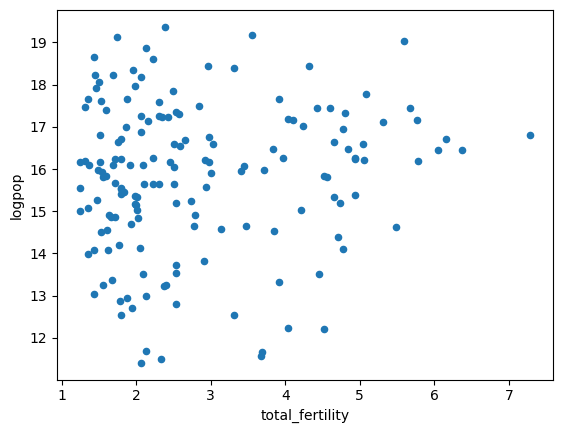

In [4]:
df.plot.scatter(x="total_fertility", y="logpop")

In [5]:
df.shape  # (rows, cols)

(161, 9)

In [6]:
train = df.iloc[::2]  # Python slicing
test = df.iloc[1::2]
train.shape, test.shape  # (rows, cols)

((81, 9), (80, 9))

### KNN implementation from scratch

In [7]:
def calc_similarity(p1, p2):
    """calculate the Euclidean Distance"""
    return math.sqrt(
        (math.log(p1["population"]) - math.log(p2["population"])) ** 2 +
        (p1["total_fertility"] - p2["total_fertility"]) ** 2
    )

In [8]:
# example for testing
calc_similarity(train.iloc[0], train.iloc[3])

3.9905320488191918

In [9]:
def predict(train, point, k):
    """train: DataFrame, point: single country"""
    #print("prediction for", point["country"])
    result = []
    # go through every data point p
    for index, p in train.iterrows():
        # calculate a similarity between 0..inf
        sim = calc_similarity(p, point)
        # add a row to result
        result.append((sim,
                       p["life_expectancy"], 
                       p["country"]))
    result.sort()  # lowest similarity first
    # take the k most similar points
    best = result[:k]
    #pprint(best)
    # calculate the average life expectancy
    ypred = sum([life for sim, life, name in best]) / k
    return ypred

In [10]:
# example for testing
predict(train, test.iloc[0], k=3)

75.3

### Calculate Mean Absolute Error for the test set

$$MAE = \frac{1}{n} \sum |y_{true} - y_{pred}|$$

In [11]:
mae = 0
n = 0
for index, point in test.iterrows():
    ypred = predict(train, point, k=7)
    ytrue = point["life_expectancy"]
    mae += abs(ypred - ytrue)
    n += 1

mae = mae / n # divide by num of countries
print(f"average prediction error MEA ={mae:5.2f} years")

average prediction error MEA = 3.80 years


### Implementation with scikit-learn

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [13]:
# define input and output
X = train[["logpop", "total_fertility"]]
y = train["life_expectancy"]

# train the model
model = KNeighborsRegressor(n_neighbors=7, metric="euclidean")
model.fit(X, y)

KNeighborsRegressor(metric='euclidean', n_neighbors=7)

In [14]:
# calculate metric
Xtest = test[["logpop", "total_fertility"]]
ytest = test["life_expectancy"]

ypred = model.predict(Xtest)
mae = mean_absolute_error(ytest, ypred)
print(f"average prediction error MEA ={mae:5.2f} years")

average prediction error MEA = 3.80 years
